In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import proplot
from natsort import natsorted

/home/s2208943/miniconda3/envs/wmh/lib/python3.8/site-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [2]:
file_path = "/home/s2208943/ipdis/data/MSS3_Maria_analysis/WMH_inter_observer_voxelwise_analysis/Voxelwise_agreement.xlsx"

In [3]:
df = pd.read_excel(file_path)

In [4]:
df

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
0,MSS3_ED_001_V1,6825,6578,1886164,0.517206,0.681788,0.669451,0.694588,0.998931,0.998800
1,MSS3_ED_001_V2a,11215,13999,1886164,0.758789,0.862854,0.969951,0.777056,0.998335,0.999820
2,MSS3_ED_001_V2b,11452,13947,1886164,0.752018,0.858459,0.951973,0.781673,0.998376,0.999706
3,MSS3_ED_001_V3,12023,14612,1886164,0.734049,0.846630,0.937786,0.771626,0.998219,0.999600
4,MSS3_ED_002_V1,56156,56042,2393629,0.885681,0.939375,0.938422,0.940330,0.998569,0.998521
...,...,...,...,...,...,...,...,...,...,...
57,MSS3_ED_075_V1,6657,6738,1954902,0.062758,0.118104,0.118822,0.117394,0.996948,0.996989
58,MSS3_ED_077_V1,2712,3266,2113593,0.827576,0.905654,0.998156,0.828843,0.999735,0.999998
59,MSS3_ED_078_V1,8459,10288,1742275,0.031983,0.061983,0.068684,0.056474,0.994401,0.995451
60,MSS3_ED_079_V1,6110,6956,1560672,0.030442,0.059085,0.063175,0.055492,0.995774,0.996316


Text(0.5, 1.0, 'Rater 1 volume vs Rater 2 volume')

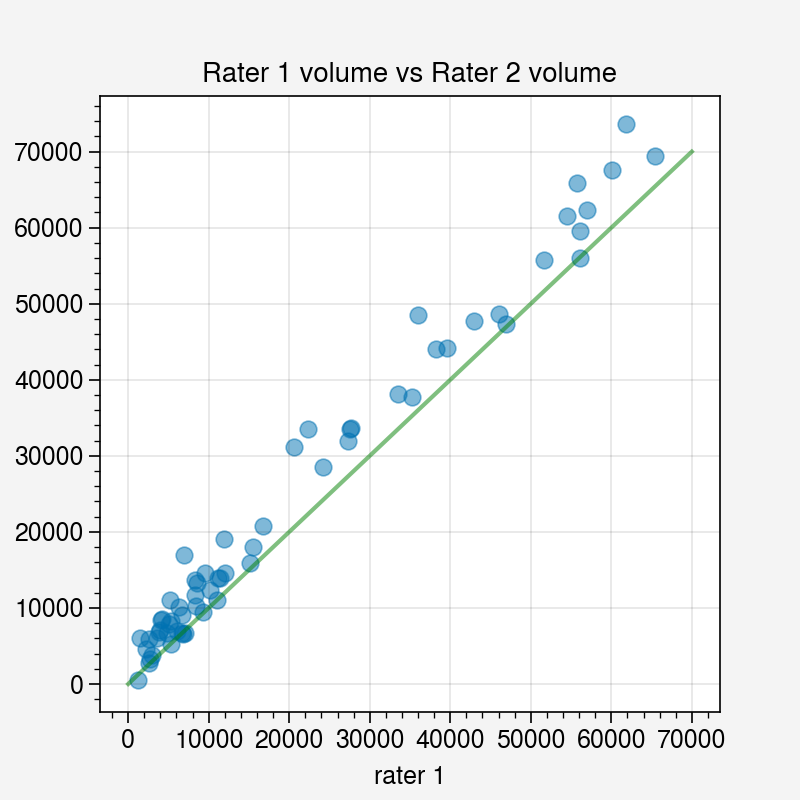

In [5]:
plt.plot([0, 70000], [0, 70000], c='green', alpha=0.5)
plt.scatter(df["WMH1_mm3"], df["WMH2_mm3"], alpha=0.5)
plt.xlabel("rater 1")
plt.ylabel("rater 2")
plt.title("Rater 1 volume vs Rater 2 volume")

Text(0, 0.5, 'Dice between raters')

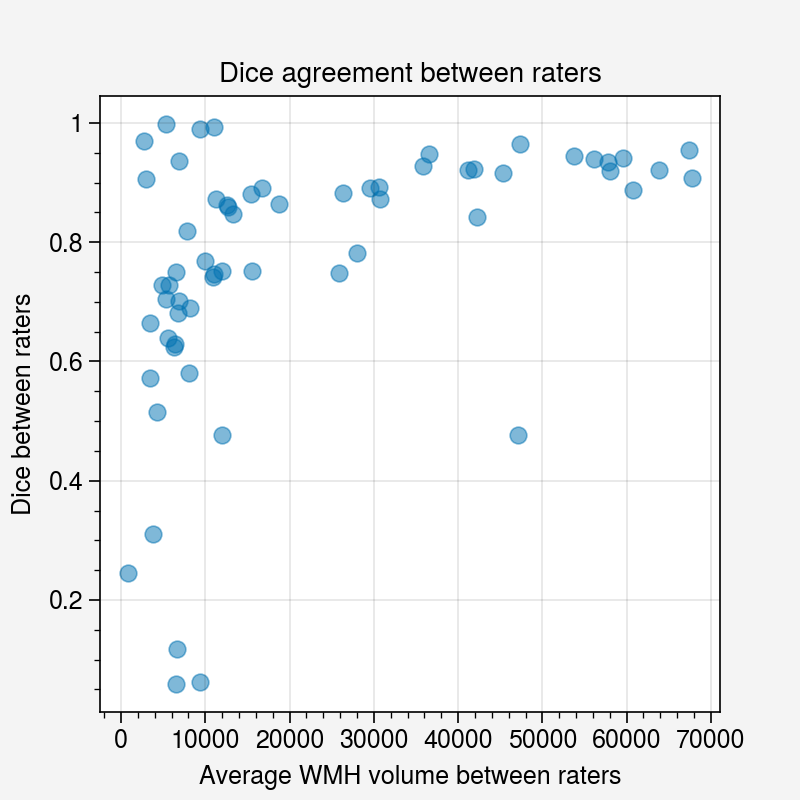

In [6]:
plt.scatter((df["WMH1_mm3"] + df["WMH2_mm3"]) / 2, df["DSC"], alpha=0.5)
plt.title("Dice agreement between raters")
plt.xlabel("Average WMH volume between raters")
plt.ylabel("Dice between raters")

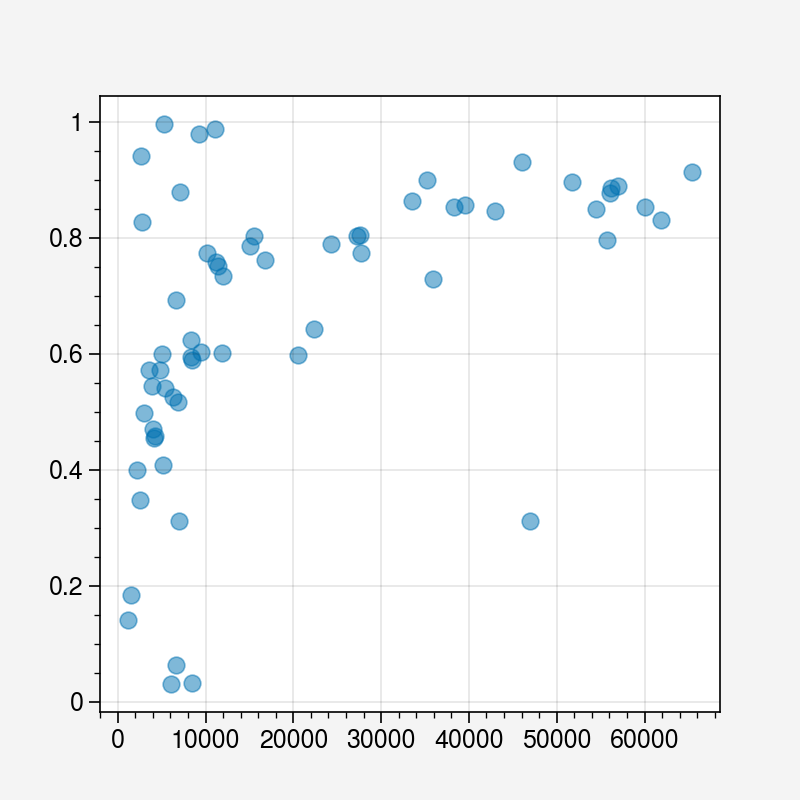

In [7]:
plt.scatter(df["WMH1_mm3"], df["JI"], alpha=0.5)

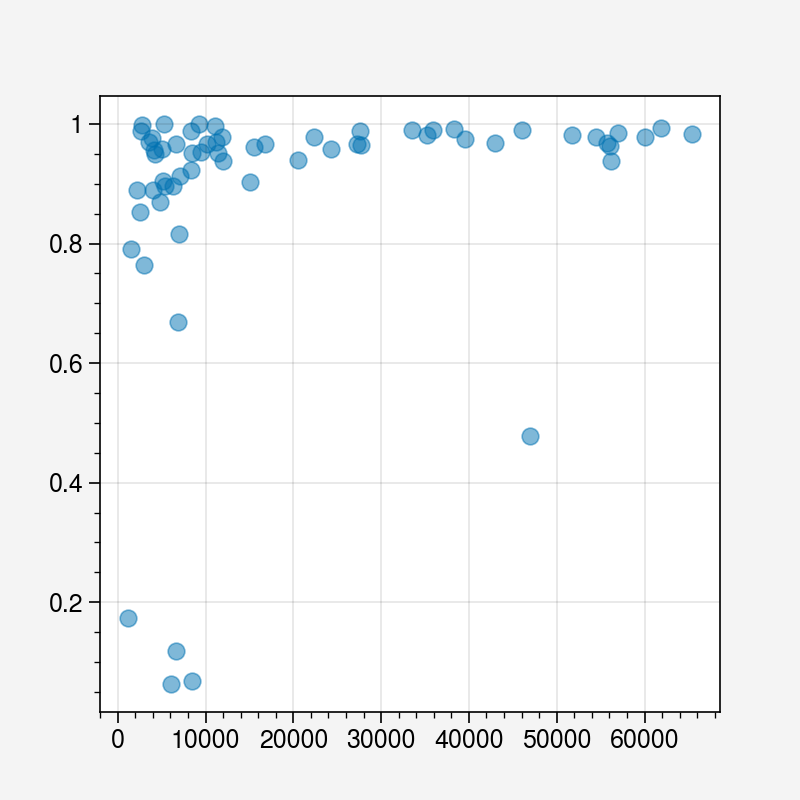

In [8]:
plt.scatter(df["WMH1_mm3"], df["TPF_1"], alpha=0.5)

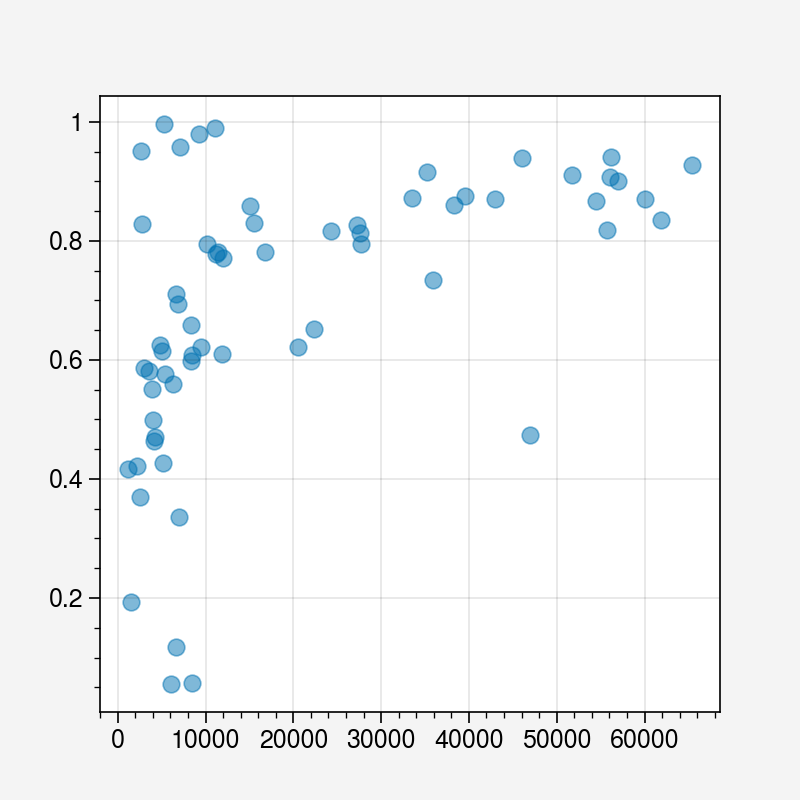

In [9]:
plt.scatter(df["WMH1_mm3"], df["TPF_2"], alpha=0.5)

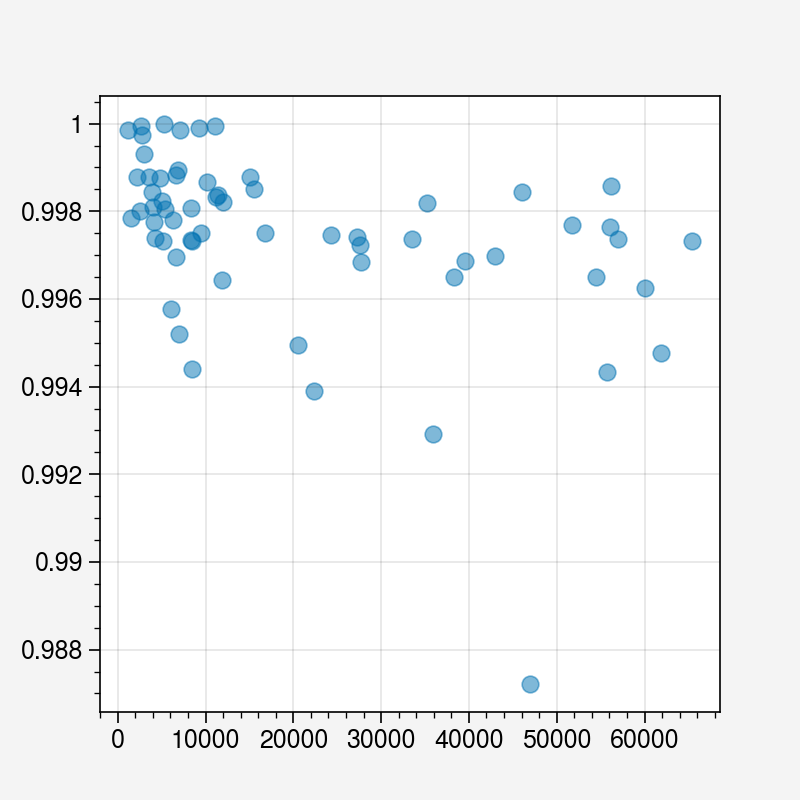

In [10]:
plt.scatter(df["WMH1_mm3"], df["TNF_1"], alpha=0.5)

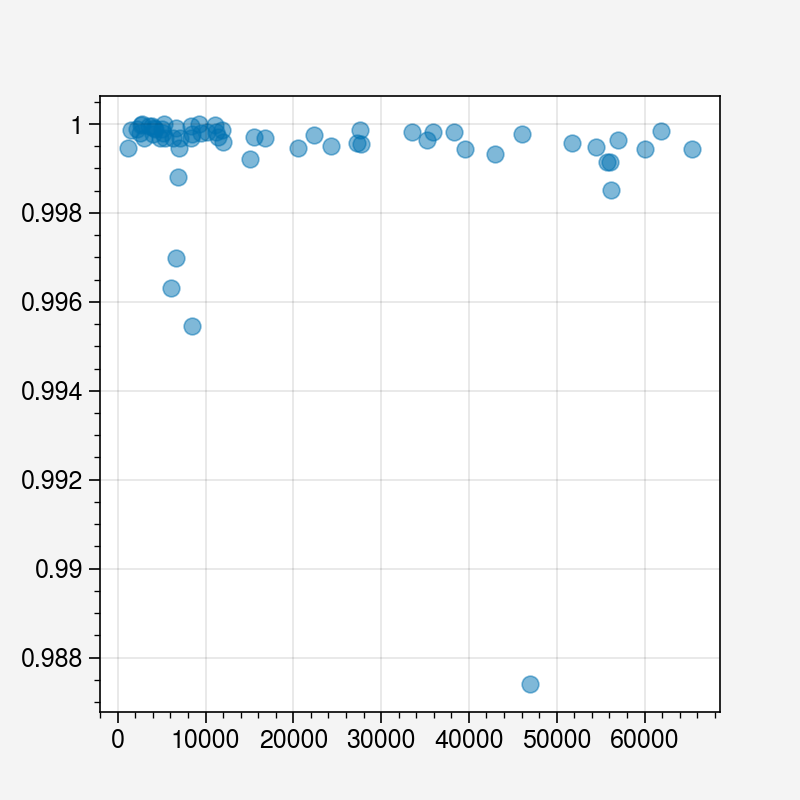

In [11]:
plt.scatter(df["WMH1_mm3"], df["TNF_2"], alpha=0.5)

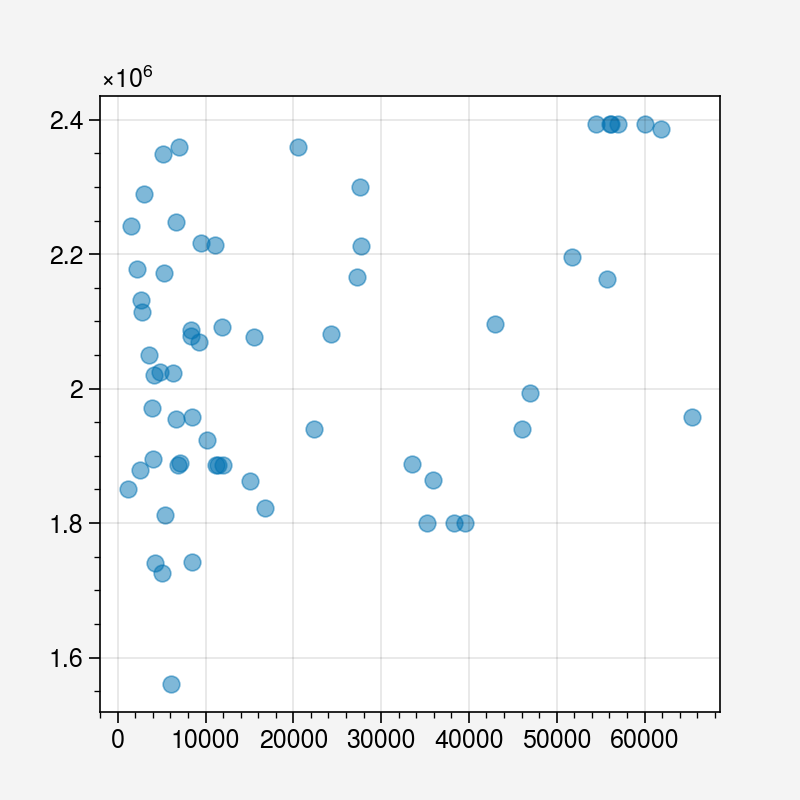

In [12]:
plt.scatter(df["WMH1_mm3"], df["ICV_mm3"], alpha=0.5)

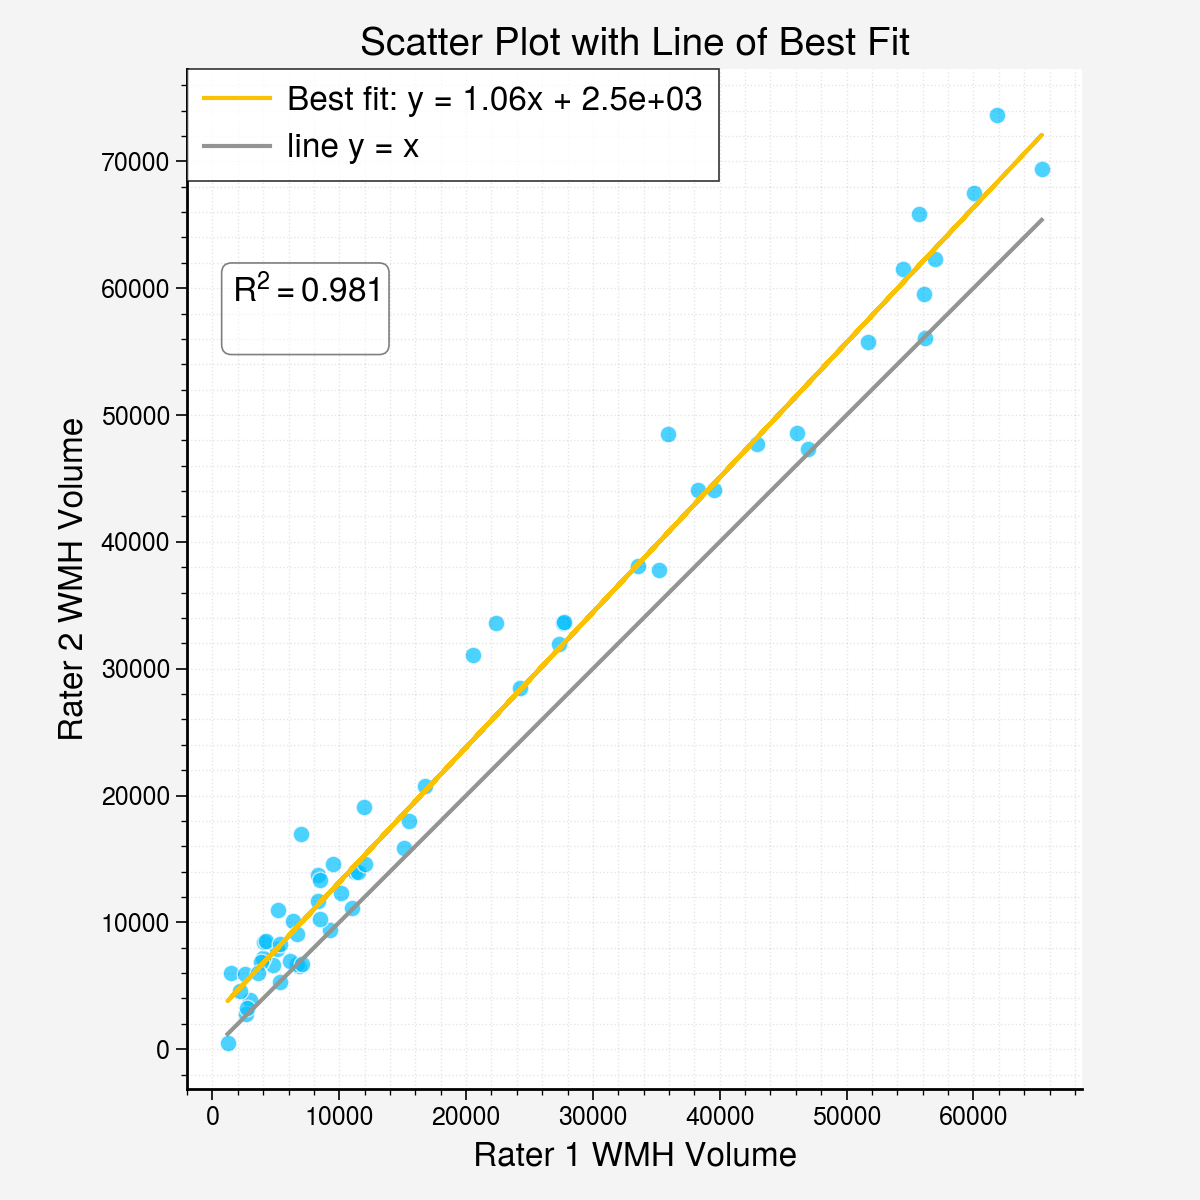

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example data
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]

# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Create scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, color='deepskyblue', alpha=0.7, edgecolors='w', linewidth=0.5)

# Plot line of best fit
plt.plot(x.values, line.values, color='goldenrod', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
plt.plot([min(x), max(x)], [min(x), max(x)], color='gray', label=f'line y = x')

# Annotate with text (R^2 and line equation)
plt.text(0.05, 0.80, f'$R^2 = {r_value**2:.3f}$\n', transform=plt.gca().transAxes,
         fontsize=12,  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Enhance aesthetics
plt.title('Scatter Plot with Line of Best Fit', fontsize=14, )
plt.xlabel('Rater 1 WMH Volume', fontsize=12, )
plt.ylabel('Rater 2 WMH Volume', fontsize=12, )
plt.legend(fontsize=12)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.set_aspect('equal', adjustable='box')

for tick in ax.get_xticklabels():
    tick.set_fontname(font)
    # tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontname(font)
    # tick.set_fontweight("bold")

plt.tight_layout()    

# Show plot
plt.show()


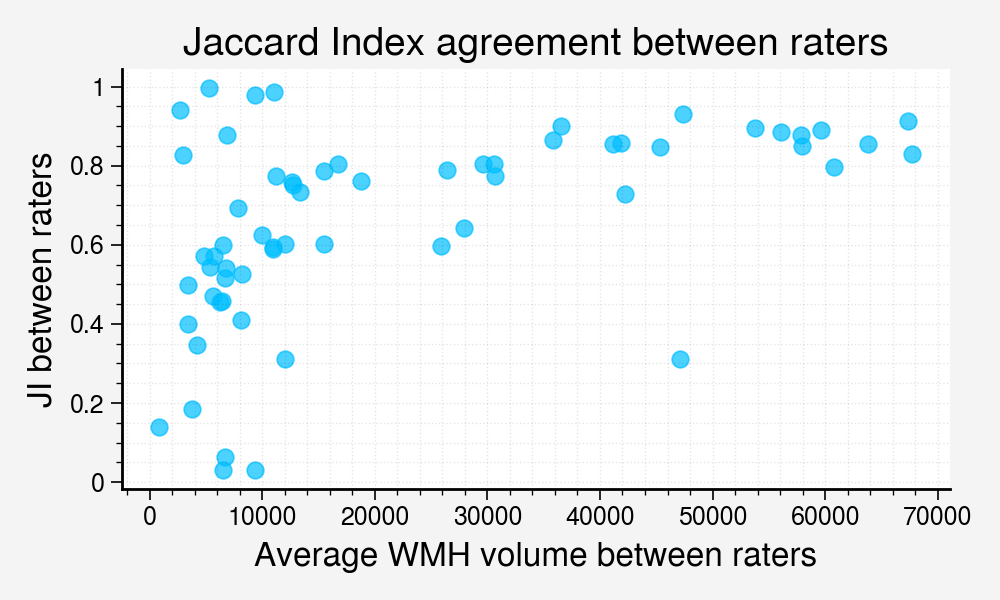

In [46]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(5, 3))
y = df["JI"]
x = (df["WMH1_mm3"] + df["WMH2_mm3"]) / 2
ax.scatter(x, y, alpha=0.7, c='deepskyblue')

# annotation
plt.title("Jaccard Index agreement between raters", fontsize=14)
plt.xlabel("Average WMH volume between raters", fontsize=12)
plt.ylabel("JI between raters", fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

plt.tight_layout()

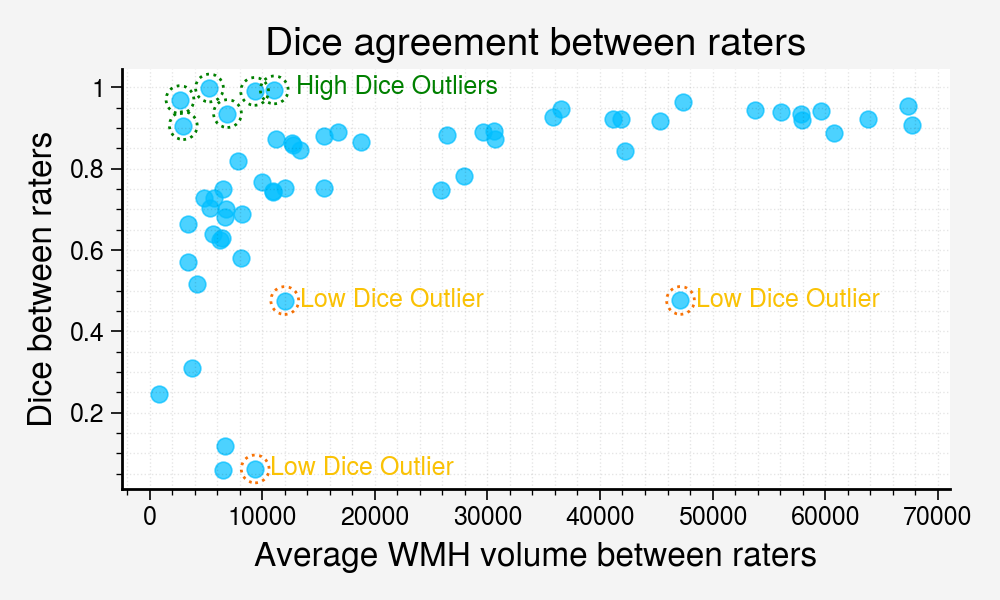

In [47]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(5, 3))
y = df["DSC"]
x = (df["WMH1_mm3"] + df["WMH2_mm3"]) / 2
ax.scatter(x, y, alpha=0.7, c='deepskyblue')

# annotation
plt.title("Dice agreement between raters", fontsize=14)
plt.xlabel("Average WMH volume between raters", fontsize=12)
plt.ylabel("Dice between raters", fontsize=12)

# point out influential outliers
for (xi, yi) in zip(x, y):
    if xi > 8000 and yi < 0.5:
        scatter = ax.scatter(xi, yi, facecolors='none', edgecolors='orange', linewidth=1, s=100, linestyle=':')
        ax.text(xi + max(x) * 0.02, yi, 'Low Dice Outlier', verticalalignment='center', horizontalalignment='left', color='goldenrod')
for (xi, yi) in zip(x, y):
    if xi < 15000 and yi > 0.9:
        scatter = ax.scatter(xi, yi, facecolors='none', edgecolors='green', linewidth=1, s=100, linestyle=':')
        # ax.text(xi + max(x) * 0.02, yi, 'Low Dice Outlier', verticalalignment='center', horizontalalignment='left')
ax.text(13000, 1, 'High Dice Outliers', verticalalignment='center', horizontalalignment='left', color='green')

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

plt.tight_layout()

In [20]:
np.where(((y < 0.5) * (x > 8000)).values)

(array([22, 56, 59]),)

In [21]:
df.iloc[[22, 56, 59]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
22,MSS3_ED_016_V1,6993,17005,2359501,0.312227,0.475873,0.816531,0.335784,0.995199,0.999452
56,MSS3_ED_073_V1,46966,47337,1993830,0.312407,0.476082,0.477963,0.474217,0.987216,0.987404
59,MSS3_ED_078_V1,8459,10288,1742275,0.031983,0.061983,0.068684,0.056474,0.994401,0.995451


In [57]:
df.iloc[[22, 56, 59]]['Dataset ID'].values

array(['MSS3_ED_016_V1', 'MSS3_ED_073_V1', 'MSS3_ED_078_V1'], dtype=object)

In [22]:
np.where(((y > 0.9) * (x < 15000)).values)

(array([49, 50, 54, 55, 58, 61]),)

In [23]:
df.iloc[[49, 50, 54, 55, 58, 61]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
49,MSS3_ED_043_V1,11030,11102,2213066,0.987071,0.993494,0.996736,0.990272,0.999951,0.999984
50,MSS3_ED_044_V1,5303,5323,2172630,0.996243,0.998118,1.000000,0.996243,0.999991,1.000000
54,MSS3_ED_070_V1,9231,9420,2068806,0.979726,0.989759,0.999892,0.979830,0.999908,1.000000
55,MSS3_ED_071_V1,2639,2745,2131459,0.940880,0.969539,0.989011,0.950820,0.999937,0.999986
58,MSS3_ED_077_V1,2712,3266,2113593,0.827576,0.905654,0.998156,0.828843,0.999735,0.999998
61,MSS3_ED_080_V1,7076,6751,1889192,0.878413,0.935272,0.913793,0.957784,0.999849,0.999676


In [58]:
df.iloc[[49, 50, 54, 55, 58, 61]]['Dataset ID'].values

array(['MSS3_ED_043_V1', 'MSS3_ED_044_V1', 'MSS3_ED_070_V1',
       'MSS3_ED_071_V1', 'MSS3_ED_077_V1', 'MSS3_ED_080_V1'], dtype=object)

In [94]:
### low dice
df.iloc[np.where(df['DSC'] < 0.7)]['Dataset ID'].values

array(['MSS3_ED_001_V1', 'MSS3_ED_007_V1', 'MSS3_ED_009_V1',
       'MSS3_ED_012_V1', 'MSS3_ED_014_V1', 'MSS3_ED_016_V1',
       'MSS3_ED_018_V1', 'MSS3_ED_023_V1', 'MSS3_ED_024_V1',
       'MSS3_ED_027_V1', 'MSS3_ED_036_V1', 'MSS3_ED_039_V1',
       'MSS3_ED_073_V1', 'MSS3_ED_075_V1', 'MSS3_ED_078_V1',
       'MSS3_ED_079_V1'], dtype=object)

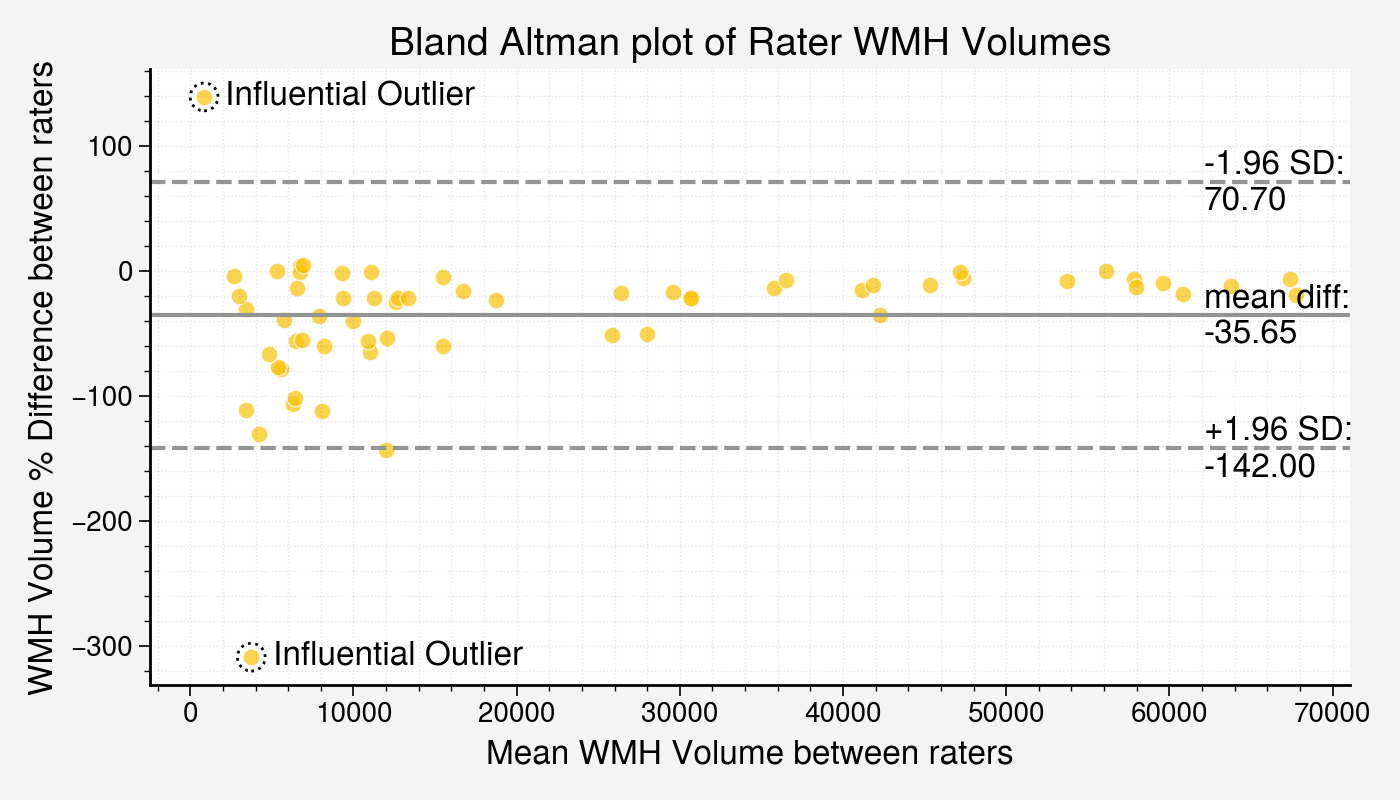

In [90]:
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]
diff = (x - y)
percent_diff = 100 * diff / np.minimum(x, y)
mean_percent_diff = np.mean(percent_diff)
mean = (x + y) / 2
std = np.std(percent_diff, ddof=1)
conf_bound_95 = 1.96 * std

fontsize = 12

fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(mean, percent_diff, color='goldenrod', alpha=0.7, edgecolors='w', linewidth=0.5)

# mean and 95% confidence lines
ax.axhline(y=mean_percent_diff, color='gray')
rhs_point = max(x) * 0.95
ax.text(rhs_point, mean_percent_diff + 1, 'mean diff:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - 3, f'{mean_percent_diff:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff - conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff - conf_bound_95 + 1, '+1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff - conf_bound_95 - 3, f'{mean_percent_diff - conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)
ax.axhline(y=mean_percent_diff + conf_bound_95, color='gray', linestyle='--')
ax.text(rhs_point, mean_percent_diff + conf_bound_95 + 1, '-1.96 SD:', verticalalignment='bottom', horizontalalignment='left', fontsize=fontsize)
ax.text(rhs_point, mean_percent_diff + conf_bound_95 - 3, f'{mean_percent_diff + conf_bound_95:.2f}', verticalalignment='top', horizontalalignment='left', fontsize=fontsize)

# point out influential outliers
outlier_sd = 3
for (m, pd) in zip(mean, percent_diff):
    if pd > mean_percent_diff + (3 * std) or pd < mean_percent_diff - (3 * std):
        scatter = ax.scatter(m, pd, facecolors='none', edgecolors='black', linewidth=1, s=100, linestyle=':')
        ax.text(m + max(x) * 0.02, pd, 'Influential Outlier', verticalalignment='center', horizontalalignment='left', fontsize=fontsize)

# spines and ticks
ax = plt.gca() # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)
plt.minorticks_on()
ax.tick_params(axis='both', labelsize=fontsize-2)

# legend
# plt.legend(fontsize=12)

# grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)


plt.title("Bland Altman plot of Rater WMH Volumes", fontsize=fontsize+2)
plt.ylabel("WMH Volume % Difference between raters", fontsize=fontsize)
plt.xlabel("Mean WMH Volume between raters", fontsize=fontsize)

plt.tight_layout()

In [85]:
np.where((percent_diff > mean_percent_diff + (3 * std)) | (percent_diff < mean_percent_diff - (3 * std)))

(array([15, 42]),)

In [91]:
df.iloc[[15, 42]]

,Dataset ID,WMH1_mm3,WMH2_mm3,ICV_mm3,JI,DSC,TPF_1,TPF_2,TNF_1,TNF_2
15,MSS3_ED_009_V1,1469,6007,2242243,0.184223,0.311129,0.791695,0.193607,0.997838,0.999863
42,MSS3_ED_036_V1,1193,499,1850185,0.140162,0.245863,0.174350,0.416834,0.999843,0.999467


In [92]:
df.iloc[[15, 42]]['Dataset ID'].values

array(['MSS3_ED_009_V1', 'MSS3_ED_036_V1'], dtype=object)

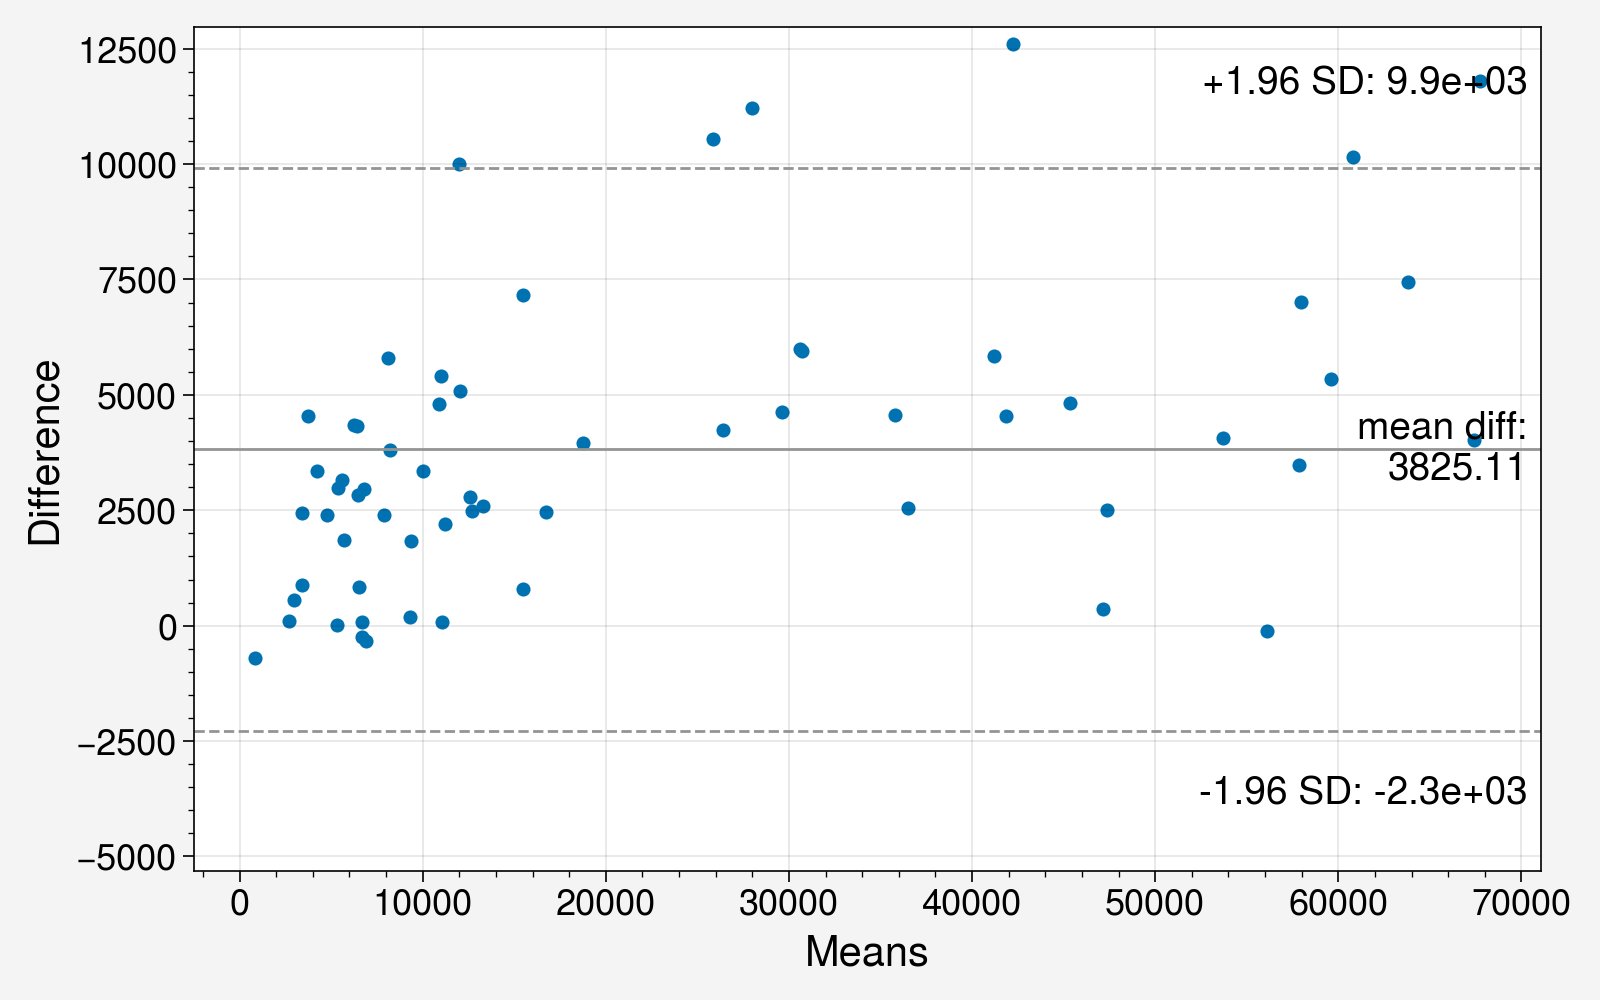

In [29]:
import statsmodels.api as sm
#create Bland-Altman plot                  
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y, x, ax = ax)

#display Bland-Altman plot
plt.show()

In [99]:
np.mean(x-y)

-3825.1129032258063

In [101]:
sem = np.std(x-y, ddof=1) / np.sqrt(len(x))

In [102]:
sem

398.2267311532356

In [105]:
-1.96 * np.std(y-x, ddof=1) + np.mean(y-x)

-2320.7423135896147

In [89]:
len(x)

62